In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

In [2]:
import pandas as pd

# convert to dataframe
feature_names_wine = wine.feature_names

wine_df = pd.DataFrame(X_wine,columns=feature_names_wine)


In [3]:
wine_df['wine_class'] = wine.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# check distribution for outliers and normality

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def make_chart(x,df):
    data = df[x].values

    z_scores = np.abs(stats.zscore(data))

    z_threshold = 3

    mean_data = np.mean(data)

    std_dev_data = np.std(data)
    cutoff_z_score_high = mean_data + z_threshold * std_dev_data
    cutoff_z_score_low = mean_data - z_threshold * std_dev_data

    # IQR Method
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1

    # outlier
    outlier_bound = 1.5 * IQR

    # define lower and upper bounds
    lower_bound = Q1 - outlier_bound
    upper_bound = Q3 + outlier_bound

    plt.figure(figsize=(8,3))
    sns.histplot(data,kde=True,bins=20,color='skyblue')

    plt.axvline(x=cutoff_z_score_high,color='r',linestyle='--',linewidth=2,label=f'z-score cutoff:{cutoff_z_score_high}')
    plt.axvline(x=cutoff_z_score_low,color='r',linestyle='--',linewidth=2,label=f'z-score cutoff:{cutoff_z_score_low}')
    plt.axvline(x=upper_bound,color='g',linestyle='--',linewidth=2,label=f'upper_bound:{upper_bound}')
    plt.axvline(x=lower_bound,color='g',linestyle='--',linewidth=2,label=f'lower_bound:{lower_bound}')

    #plt.scatter(data[outlier_list_col_iqr],np.zeros(len(outlier_list_col_iqr)))

    plt.title(f'histogram with outliers for {x}')
    plt.legend()
    plt.show()
    


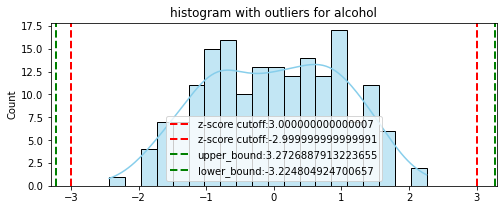

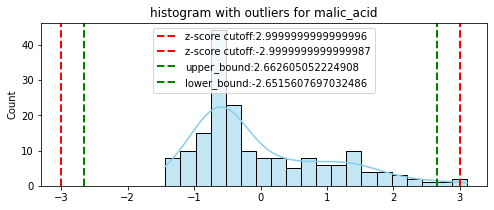

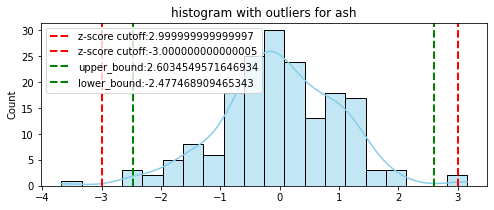

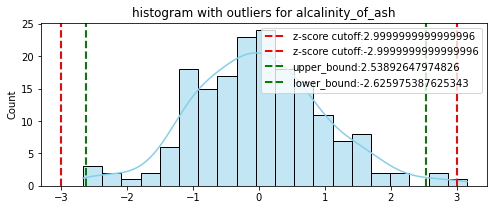

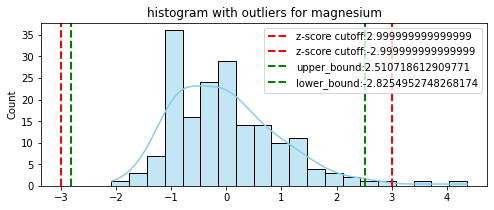

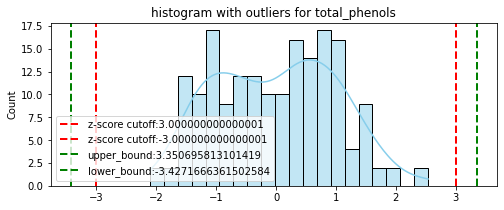

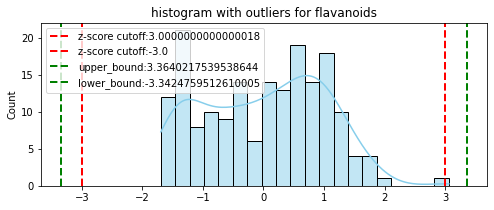

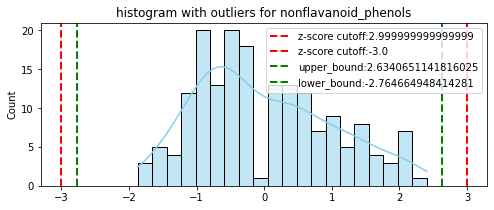

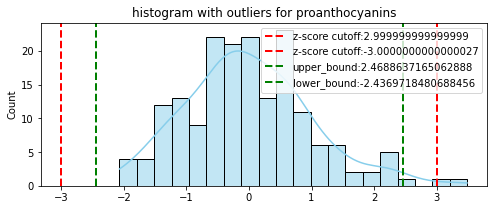

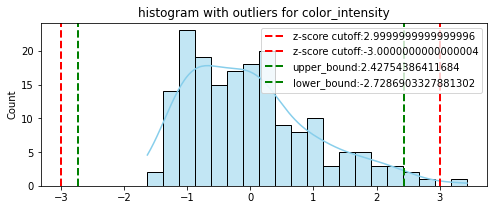

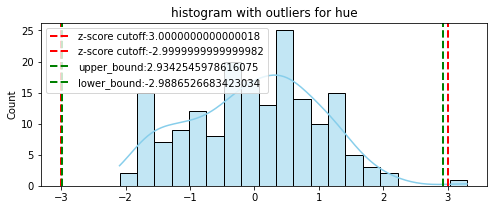

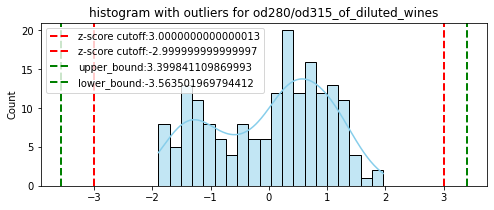

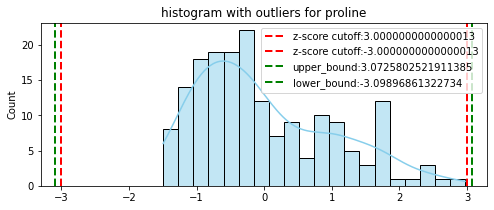

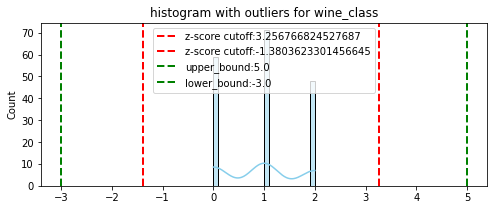

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [5]:
# apply standardscaler to all features

from sklearn.preprocessing import StandardScaler

wine_df_standardized = pd.DataFrame(StandardScaler().fit_transform(X_wine), columns = wine.feature_names)

# add the target values

wine_df_standardized['wine_class'] = wine.target


for x in wine_df_standardized.columns:
    make_chart(x,wine_df_standardized)
wine_df_standardized.head()

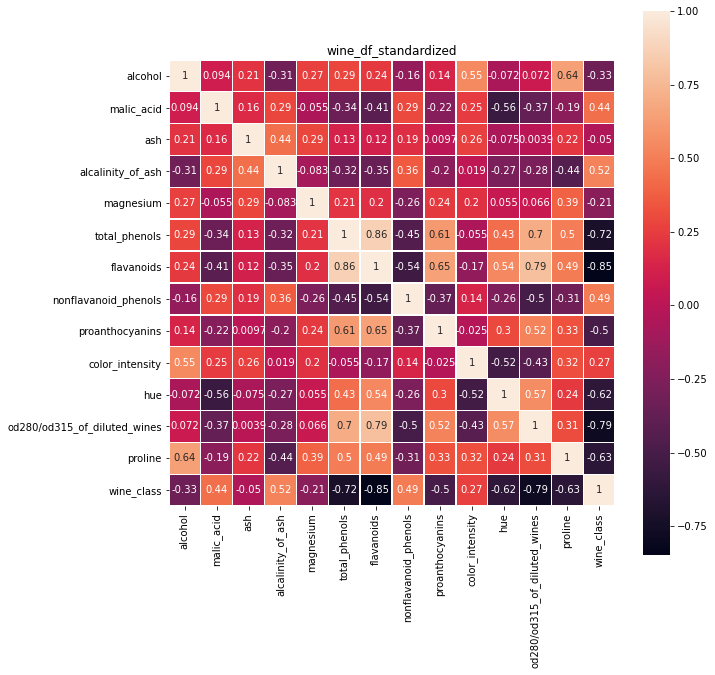

In [6]:
# Make the correlation matrices
corrmat_wine = wine_df_standardized.corr()

fig, ax = plt.subplots(figsize=(10,10))  
# Draw the heat map using seaborn
sns.heatmap(corrmat_wine, square=True, annot=True, linewidths=.5,ax=ax)
plt.title("wine_df_standardized")

plt.show()



Highest correlations: flavanoids (-0.85), total_phenols(-0.72), alcalinity_of_ash (0.52),nonflavnoid phenols(0.49), $ of diluted wines (-0.79)

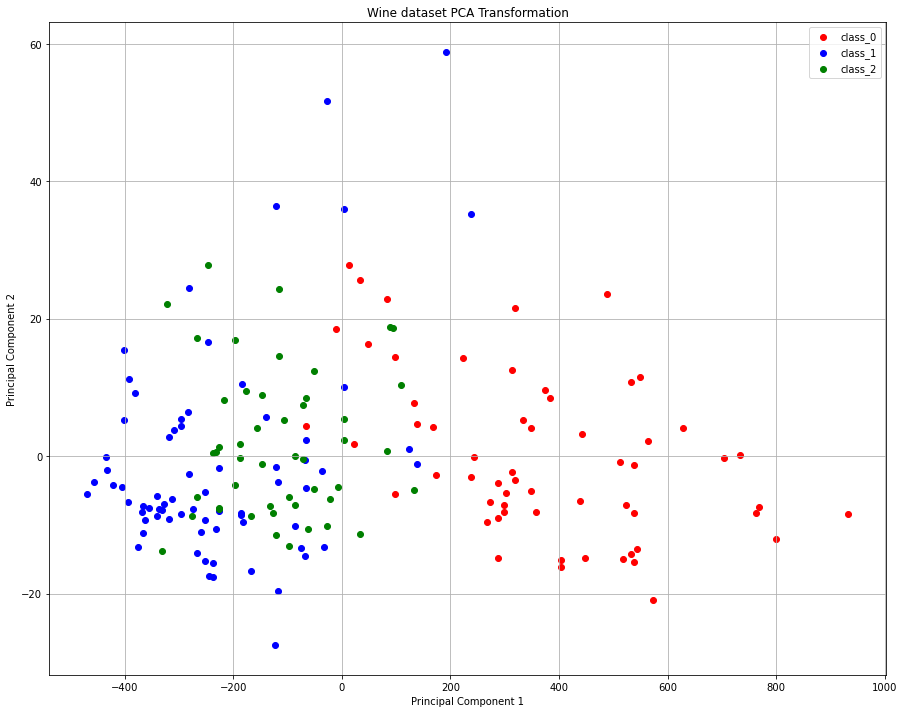

In [7]:
# Plotting the PCA-transformed Wine data
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_wine)

plt.figure(figsize=(15,12))
plt.scatter(X_wine_pca[y_wine == 0,0],X_wine_pca[y_wine == 0,1], color='red',label=wine.target_names[0])
plt.scatter(X_wine_pca[y_wine == 1,0],X_wine_pca[y_wine == 1,1], color='blue',label=wine.target_names[1])
plt.scatter(X_wine_pca[y_wine == 2,0],X_wine_pca[y_wine == 2,1], color='green',label=wine.target_names[2])

plt.title('Wine dataset PCA Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend()
plt.grid(True)
plt.show()

wine_df_standardized.head()

wine_df_unlabeled = wine_df_standardized.drop('wine_class', axis=1)

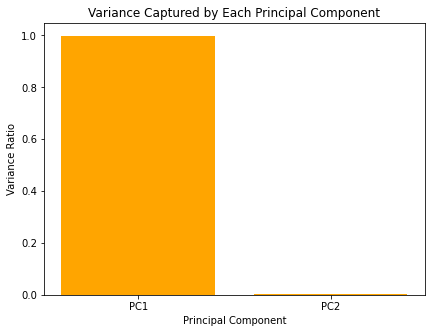

In [8]:
# Plotting the amount of variance captured by each principal component
plt.figure(figsize=(15,5))

# First plot: Variance Ratio with updated labels
plt.subplot(1,2,1)
plt.bar(['PC1','PC2'], pca_wine.explained_variance_ratio_, color='orange',align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.show()

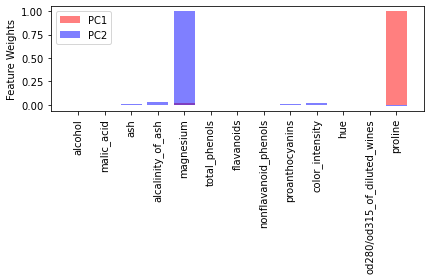

In [9]:
components_wine = pca_wine.components_
n_features_wine = components_wine.shape[1]
X_values_wine = range(n_features_wine)
feature_names_wine = wine.feature_names

for i, (component,color) in enumerate(zip(components_wine, ['red','blue'])):
    plt.bar(X_values_wine, component, align='center',label=f'PC{i+1}',color=color,alpha=0.5)
plt.xticks(X_values_wine,feature_names_wine, rotation=90)
plt.ylabel('Feature Weights')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_kmeans_labels = kmeans.fit_predict(X_wine_pca)
kmeans_labels = kmeans.fit_predict(X_wine)

colormap = plt.cm.rainbow
colors= colormap(pca_kmeans_labels.astype(float)/n_clusters)

wine_df_standardized['pca_kmeans_labels'] = pca_kmeans_labels
wine_df_standardized['kmeans_labels'] = kmeans_labels


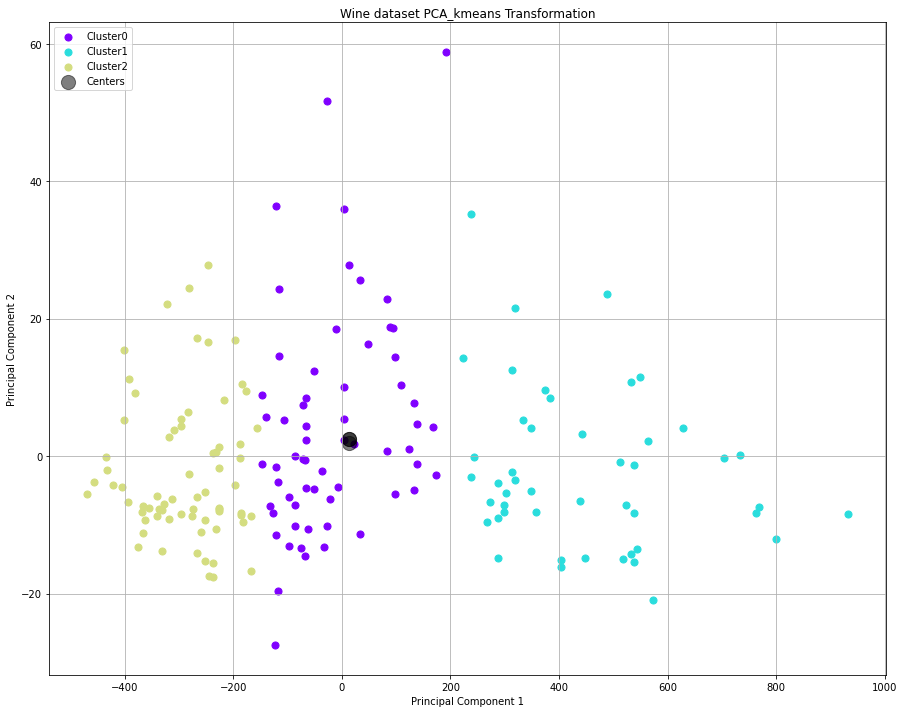

In [11]:
plt.figure(figsize=(15,12))

for i in range(n_clusters):
    plt.scatter(X_wine_pca[pca_kmeans_labels==i,0],X_wine_pca[pca_kmeans_labels==i,1],color=colormap(float(i)/n_clusters),s=50,label=f'Cluster{i}')
    
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5,label='Centers')


plt.title('Wine dataset PCA_kmeans Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [13]:
centers

array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])